#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la corespondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.

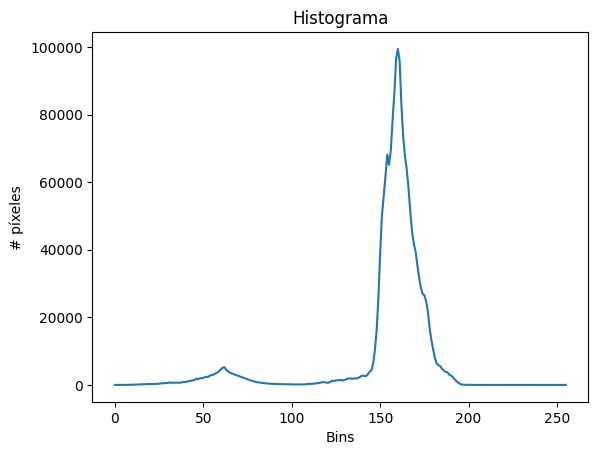

In [2]:
#Vizaulización del histograma de la imagen MonedasPropias.jpg, para elegir el umbral
img = cv2.imread('MonedasPropias.jpg')
monedas_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([monedas_gris], [0], None, [256], [0, 256])

plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)

Umbral fijo usado  120.0
Umbral Otsu  110.0


Text(0.5, 1.0, 'OTSU invertida')

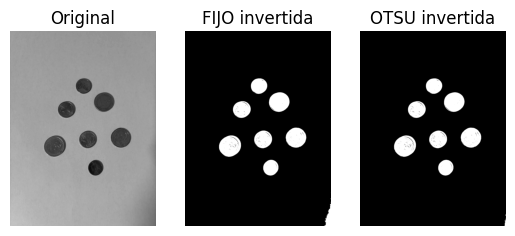

In [3]:
#Selección del umbral

#Opción 1: Umbralizado fijo
umbral = 120
th1,img_th1 = cv2.threshold(monedas_gris,umbral,255,cv2.THRESH_BINARY_INV)
print('Umbral fijo usado ', th1)

#Opción 2: Umbralizado con Otsu
th2,img_th2 = cv2.threshold(monedas_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print('Umbral Otsu ', th2)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(monedas_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

C:\Users\Mauro Gómez\AppData\Local\Temp\ipykernel_129320\514415413.py:54: RuntimeWarning: overflow encountered in scalar subtract
  if np.sqrt((x_original - x_circulo) ** 2 + (y_original - y_circulo) ** 2) <= radio:


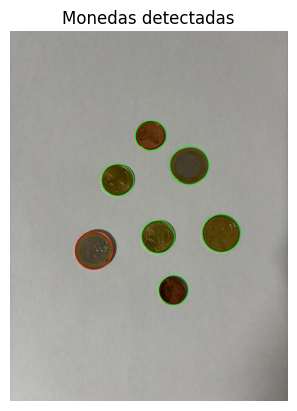

El valor de la moneda seleccionada es de:  1.0
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


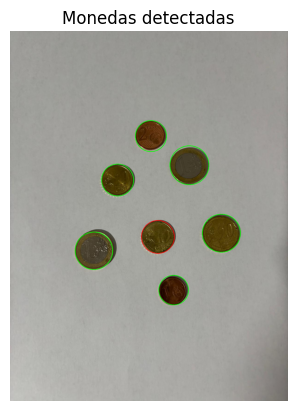

El valor de la moneda seleccionada es de:  0.1
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


C:\Users\Mauro Gómez\AppData\Local\Temp\ipykernel_129320\514415413.py:54: RuntimeWarning: overflow encountered in scalar add
  if np.sqrt((x_original - x_circulo) ** 2 + (y_original - y_circulo) ** 2) <= radio:


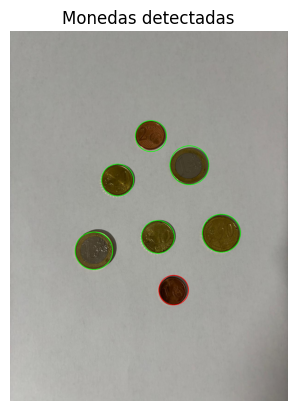

El valor de la moneda seleccionada es de:  0.02
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


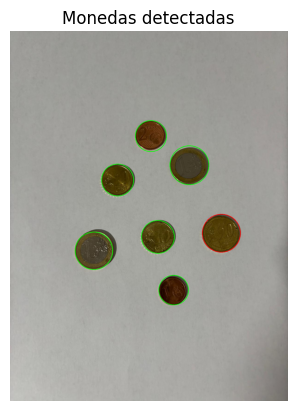

El valor de la moneda seleccionada es de:  1.0
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


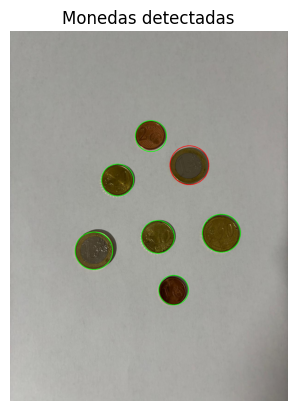

El valor de la moneda seleccionada es de:  1.0
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


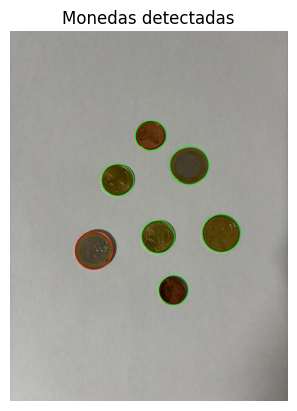

El valor de la moneda seleccionada es de:  1.0
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


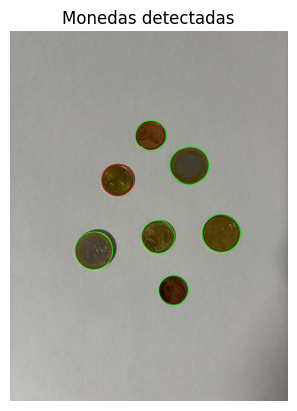

El valor de la moneda seleccionada es de:  0.1
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


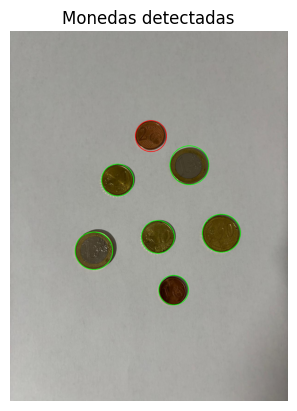

El valor de la moneda seleccionada es de:  0.1
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


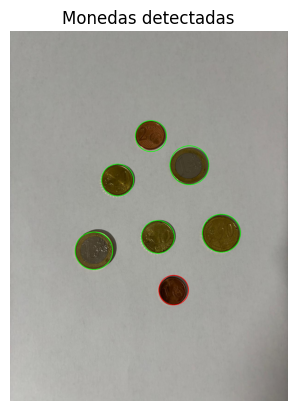

El valor de la moneda seleccionada es de:  0.02
Número de monedas: 7
Monedas de 1.00€: 3
Monedas de 0.10€: 3
Monedas de 0.02€: 1
Valor total de las monedas: 3.32€


In [71]:
#Detección de monedas con el umbral de Otsu

#Convertir la imagen original a escala de grises
monedas_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Aplicar un desenfoque Gaussiano para reducir el ruido y suavizar la imagen
pimg = cv2.GaussianBlur(monedas_gris, (9, 9), 2)
edges = cv2.Canny(pimg, 50, 150)

monedas_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Redimensionar la imagen para que se muestre correctamente en la pantalla
width = int(monedas_rgb.shape[1] * 0.5)
height = int(monedas_rgb.shape[0] * 0.5)
dim = (width, height)
img_resized = cv2.resize(monedas_rgb, dim, cv2.INTER_AREA)

#Factor de escala para convertir las coordenadas de la imagen redimensionada a la original
escala_X = img.shape[1] / img_resized.shape[1]
escala_Y = img.shape[0] / img_resized.shape[0]

#Detectar círculos en la imagen usando el método Hough Circle Transform
circ = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=50,
    param1=100,
    param2=30,
    minRadius=30,
    maxRadius=200
)

#Diccionario con los radios aproximados de las monedas y su valor en euros
valor_monedas = {
    12.875: 2.00,
    11.625: 1.00,
    11.125: 0.20,
    9.875: 0.10,
    9.375: 0.02,
    8.125: 0.01
}

#Variables para almacenar la moneda seleccionada y el conteo de monedas
monedaEscogida = None
conteo_monedas = {valor: 0 for valor in valor_monedas.values()}

#Factor de escala para convertir los radios de los círculos a milímetros
factor_escala = (23.25 / 2) / 82
margen_error = 0.75

#Función para manejar el evento de clic del ratón
def click_event(event, x, y, flags, param):
    global monedaEscogida, img_resized, circ, conteo_monedas
    if event == cv2.EVENT_LBUTTONDOWN:
        #Convertir las coordenadas de la imagen redimensionada a la original
        x_original = int(x * escala_X)
        y_original = int(y * escala_Y)

        #Si se detectaron círculos en la imagen
        if circ is not None:
            #Redondear las coordenadas y el radio de los círculos
            circulos = np.uint16(np.around(circ))

            #Buscar si el clic del ratón está dentro de un círculo
            for i, circulo in enumerate(circulos[0, :]):
                x_circulo, y_circulo, radio = circulo

                #Si el clic del ratón está dentro del círculo, seleccionar la moneda
                if np.sqrt((x_original - x_circulo) ** 2 + (y_original - y_circulo) ** 2) <= radio:
                    monedaEscogida = circulo
                    break

        find_coins(monedaEscogida)
        conteo_monedas = {valor: 0 for valor in valor_monedas.values()} #Reiniciar el conteo de monedas

#Función para encontrar las monedas en la imagen
def find_coins(moneda):
    valor_total = 0.0
    if circ is not None:
        #Redondear los círculos
        circulos = np.uint16(np.around(circ))
        contador_monedas = 0

        valor_seleccionado = 0
        for circulo in circulos[0, :]:
            #Dibujar los círculos en la imagen
            x, y, radio = circulo
            cv2.circle(img, (x, y), radio, (0, 255, 0), 2)
            cv2.circle(img, (moneda[0], moneda[1]), moneda[2], (0, 0, 255), 2)

            #Calcular el radio de la moneda en milímetros
            radio_en_mm = radio * factor_escala
            radio_en_mm_selected = moneda[2] * factor_escala

            valor_moneda = 0
            for r in valor_monedas.keys():
                #Si el radio de la moneda está dentro de un margen de error, asignar el valor de la moneda
                if r - margen_error <= round(radio_en_mm, 3) <= r + margen_error:
                    #Si el radio coincide con la moneda seleccionada, guardar su valor
                    if radio_en_mm == radio_en_mm_selected:
                        valor_seleccionado = valor_monedas[r]

                    valor_moneda = valor_monedas[r]     #Asignar el valor de la moneda detectada
                    conteo_monedas[valor_moneda] += 1   #Incrementar el conteo de monedas
                    break

            #Sumar el valor de la moneda al valor total y contar el número de monedas
            valor_total += valor_moneda
            contador_monedas += 1

        #Mostrar la imagen con los círculos dibujados
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Monedas detectadas')
        plt.show()

        #Imprimir el valor de la moneda seleccionada, el número de monedas y el valor total
        print("El valor de la moneda seleccionada es de: ", valor_seleccionado)
        print(f'Número de monedas: {contador_monedas}')
        for valor, cantidad in conteo_monedas.items():
            if cantidad > 0:
                print(f'Monedas de {valor:.2f}€: {cantidad}')
        print(f'Valor total de las monedas: {valor_total:.2f}€')
    else:
        print('No existen monedas en la imagen')

#Mostrar la imagen redimensionada con los círculos dibujados
cv2.imshow("Monedas", cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
cv2.setMouseCallback("Monedas", click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
vid = cv2.VideoCapture(0)

valor_monedas = {
    12.875: 2.00,
    11.625: 1.00,
    11.125: 0.20,
    9.875: 0.10,
    9.375: 0.02,
    8.125: 0.01
}

conteo_monedas = {valor: 0 for valor in valor_monedas.values()}
valor_total = 0.0

factor_escala = (23.25 / 2) / 82

margen_error = 0.75

mode = 0
frame_copied = False

while True:
    ret, frame = vid.read()
    if mode == 1 and not frame_copied:
        frame_copy = frame.copy()
        frame_copied = True
        frame_gris = cv2.cvtColor(frame_copy, cv2.COLOR_BGR2GRAY)
        pimg = cv2.GaussianBlur(frame_gris, (9, 9), 2)

        monedas_rgb = cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB)

        edges = cv2.Canny(pimg, 30, 120)

        circ = cv2.HoughCircles(
            edges,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=50,
            param1=100,
            param2=30,
            minRadius=10,
            maxRadius=300
        )
        
        if circ is not None:
            circulos = np.uint16(np.around(circ))
            contador_monedas = 0

            for circulo in circulos[0, :]:
                x, y, radio = circulo
                zona = frame_copy[y - radio:y + radio, x - radio:x + radio]

                altura, ancho, _ = zona.shape
                if altura > 0 and ancho > 0:
                    relacion_aspecto = ancho / altura
                    if 0.9 < relacion_aspecto < 1.1:
                        contador_monedas += 1
                        cv2.circle(frame_copy, (x, y), radio, (0, 255, 0), 2)
                        radio_en_mm = radio * factor_escala
                        valor_moneda = 0
                        for r in valor_monedas.keys():
                            if r - margen_error <= round(radio_en_mm, 3) <= r + margen_error:
                                valor_moneda = valor_monedas[r]
                                conteo_monedas[valor_moneda] += 1
                                break
                        valor_total += valor_moneda

        plt.axis("off")
        plt.imshow(cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB))
        plt.title('Monedas detectadas')
        plt.show()
        print(f'Número de monedas: {contador_monedas}')
        for valor, cantidad in conteo_monedas.items():
            if cantidad > 0:
                print(f'Monedas de {valor:.2f}€: {cantidad}')
        print(f'Valor total de las monedas: {valor_total:.2f}€')

    cv2.imshow('Cam', frame)

    tecla = cv2.waitKey(20)
    if tecla == 27:
        break
    elif tecla == ord('1'):
        contador_monedas = 0
        frame_copied = False
        mode = 1
    elif tecla == ord('2'):
        mode = 0

vid.release()
cv2.destroyAllWindows()

El mundo real es muy variado, las imágenes no siempre se capturan con unas condiciones de iluminación tan buenas o controladas. Ejemplo con aplicación de variantes de umbralizados ofrecidas por OpenCV.

Umbral escogido  204.0


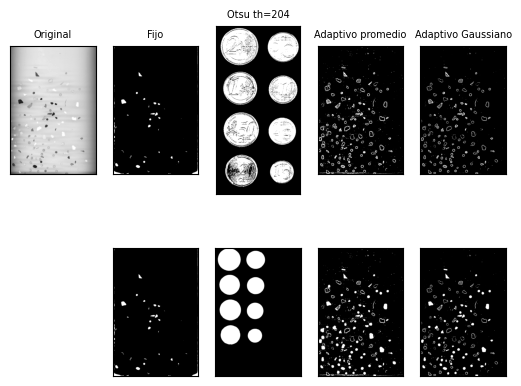

In [11]:
#Carga imagen directamente en grises
imgorig = cv2.imread('MPs.jpg', cv2.IMREAD_GRAYSCALE) 

img = cv2.GaussianBlur(imgorig,(5,5),0)

#Umbralizados
ret,imth1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
thotsu,imth2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print('Umbral escogido ', thotsu)
imth3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
imth4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
 
titles = ['Original', 'Fijo','Otsu th='+str(int(thotsu)),
            'Adaptivo promedio', 'Adaptivo Gaussiano']
images = [img, imth1, imth2, 255 - imth3, 255 - imth4]
 
for i in range(5):
    plt.subplot(2,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=7)
    plt.xticks([]),plt.yticks([])

    #Obtiene únicamente los contornos externos
    if i>0:
        res,imth = cv2.threshold(images[i],120,255,cv2.THRESH_BINARY)
        contornos, hierarchy= cv2.findContours(imth, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)  
        img_cont = np.zeros(img.shape)
        cv2.drawContours(img_cont, contornos, -1, (255,255,255), -1)  
        plt.subplot(2,5,i+6),plt.imshow(img_cont,'gray')
        plt.xticks([]),plt.yticks([])
plt.show()

Clasificación de microplásticos

Text(0.5, 1.0, 'Alquitrán')

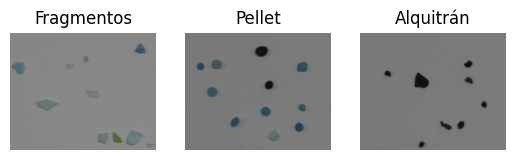

In [12]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')

El objetivo de la siguiente tarea, descrita más abajo, es desarrollar tu propio clasificador basado únicamente en heurísticas desde características geométricas y/o de apariencia, para distinguir en las imágenes completas, las partículas de cada tipo, debiendo mostrar la bondad del clasificador haciendo uso de métricas para ello. La siguiente celda obtiene varias métricas para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión. La ejecución de la celda requiere instalar el paquete scikit-learn.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador para las distintas clases conocidas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente.

El siguiente ejemplo, muestra el modo de obtener la matriz de confusión para un hipotético problema con cuatro clases, y valores de anotación (variable y) y predicción (variable y_pred) obtenidos de forma aleatoria.

Anotaciones  [1, 0, 3, 3, 0, 2, 1, 3, 2, 3, 1, 1, 1, 0, 2, 3, 1, 2, 0, 2, 1, 1, 1, 0, 3, 3, 3, 1, 2, 3, 2, 2, 3, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2, 3, 3, 3, 1, 1, 3, 1, 3, 1, 2, 2, 2, 0, 2, 3, 0, 2, 1, 0, 2, 0, 2, 3, 1, 2, 0, 2, 1, 1, 1, 3, 1, 3, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 3, 3, 1, 1, 2, 3, 3, 2, 1, 1, 2]
Predicciones  [3, 0, 2, 0, 2, 3, 1, 2, 0, 0, 0, 1, 3, 3, 0, 1, 1, 0, 1, 2, 1, 3, 1, 0, 1, 2, 3, 3, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 3, 2, 1, 0, 1, 2, 1, 2, 3, 1, 0, 3, 3, 3, 1, 2, 0, 2, 0, 3, 3, 0, 1, 2, 3, 2, 0, 0, 3, 2, 3, 3, 2, 2, 2, 0, 0, 3, 3, 2, 1, 0, 1, 3, 2, 1, 3, 0, 3, 2, 1, 0, 2, 1, 0]
¿Cómo de bien encajan anotación y predicción?
Accuracy (TP/(n))= 0.29
Precision (TP/(TP+FP)) = 0.3016722932240174
Recall (TP/(TP+FN)) = 0.29
F1 Score (2*(precision*recall)/(precision+recall)) = 0.29186888642249353


Text(38.25, 0.5, 'Real/Anotado')

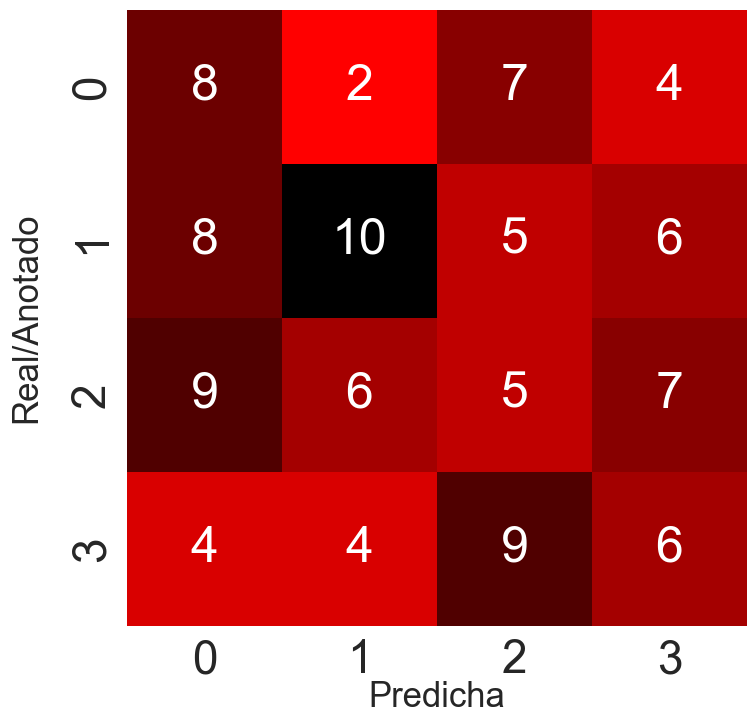

In [13]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]
print('Anotaciones ' , y)

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]
print('Predicciones ' , y_pred)

print('¿Cómo de bien encajan anotación y predicción?')

#Cálculo de métricas
accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Real/Anotado", labelpad=20, fontdict=label_font)

TAREA: Las tres imágenes cargadas en la celda inicial, han sido extraidas de las imágenes de mayor tamaño presentes en la carpeta. La tarea consiste en extraer características (geométricas y/o visuales) e identificar patrones que permitan distinguir las partículas de cada una de las tres clases, evaluando los aciertos y fallos con las imágenes completas considerando las métricas mostradas y la matriz de confusión. La matriz de confusión, muestra para cada clase el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifican incorrectamente por cada una de las otras dos clases.

En el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación entre el cuadrado del perímetro y el área de la partícula)
- Relación del área de la partícula con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.